#Computer Vision Assignment - YOLOv8 Training and Inference
##Introduction
This notebook documents the process of training a YOLOv8 object detection model on a custom dataset consisting of road camera images with the goal of detecting cars. The assignment requires creating a clear pipeline for training, validation, and testing.

#Notebook Structure
##Environment Setup
1. Checking GPU availability (!nvidia-smi).
2. Installing required packages and libraries.

In [1]:
!nvidia-smi

Tue Feb 13 18:47:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
!pip install git+https://github.com/ultralytics/yolov5.git

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

#Data and Directory Structure
1. Mounting Google Drive to access the dataset and other files.
2. Defining directory paths and confirming the existence of necessary files.

In [29]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


#Model Initialization

Initializing the YOLOv8 model using yolov8n.pt.

In [7]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 83.6MB/s]


#Training Configuration

Training the model with specific hyperparameters:
* Model: yolov8s.pt
* Dataset: dataset.yaml
* Epochs: 10
* Batch size: 8
* Image size: 416x416
* Workers: 4

Monitoring training progress using TensorBoard.

#Justifications
* Hyperparameters were intended to be low in order for this notebook to run.

* Due to computational restraints it was taking way too long in better hyperparameter choices (25+ epochs, + batch size, etc.).

* Even though I used a GPU provided by Google Colab, my environment did not allow to train the predictor with a more robust model.

 + The model used (yolov8n.pt) was selected based on its compatibility with my computational requirements. I tried running different YOLO models (yolov8s) but it took too long and my GPU had ran out of memory so I had to stick with just yolov8n.pt

In [20]:
!yolo task=detect mode=train model=yolov8s.pt data='/content/gdrive/My Drive/Computer vision/Assignment/dataset.yaml' epochs=10 workers=4 imgsz=416 batch=8

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /content/gdrive/My Drive/Computer vision/Assignment/Data/labels/val.cache... 236 images, 164 backgrounds, 0 corrupt: 100% 236/236 [00:00<?, ?it/s]
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        1/5      1.18G      1.487      3.686      1.154          1        416: 100% 118/118 [00:21<00:00,  5.48it/s]
                 Cla

### Amount of trained models
As you can see on the results above, the model used was saved under runs/detect/train3
+ This indicates I trained 3 different times, each of them with different params and hyperparams to have a better result.
 + First try with 5 epochs, then 10 and tweaking other params
   + Note: first try took almost 2 hours training just for 5 epochs

# Training Results

Displaying training results:
* Confusion matrix (confusion_matrix.png).
* Training and validation batch predictions (val_batchX_pred.jpg).
* Overall results (results.png).

In [21]:
!ls /content/runs/detect/train3/

args.yaml					     PR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			     R_curve.png	    val_batch1_labels.jpg
confusion_matrix.png				     results.csv	    val_batch1_pred.jpg
events.out.tfevents.1707850556.e1978579a73d.16450.0  results.png	    val_batch2_labels.jpg
F1_curve.png					     train_batch0.jpg	    val_batch2_pred.jpg
labels_correlogram.jpg				     train_batch1.jpg	    weights
labels.jpg					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg


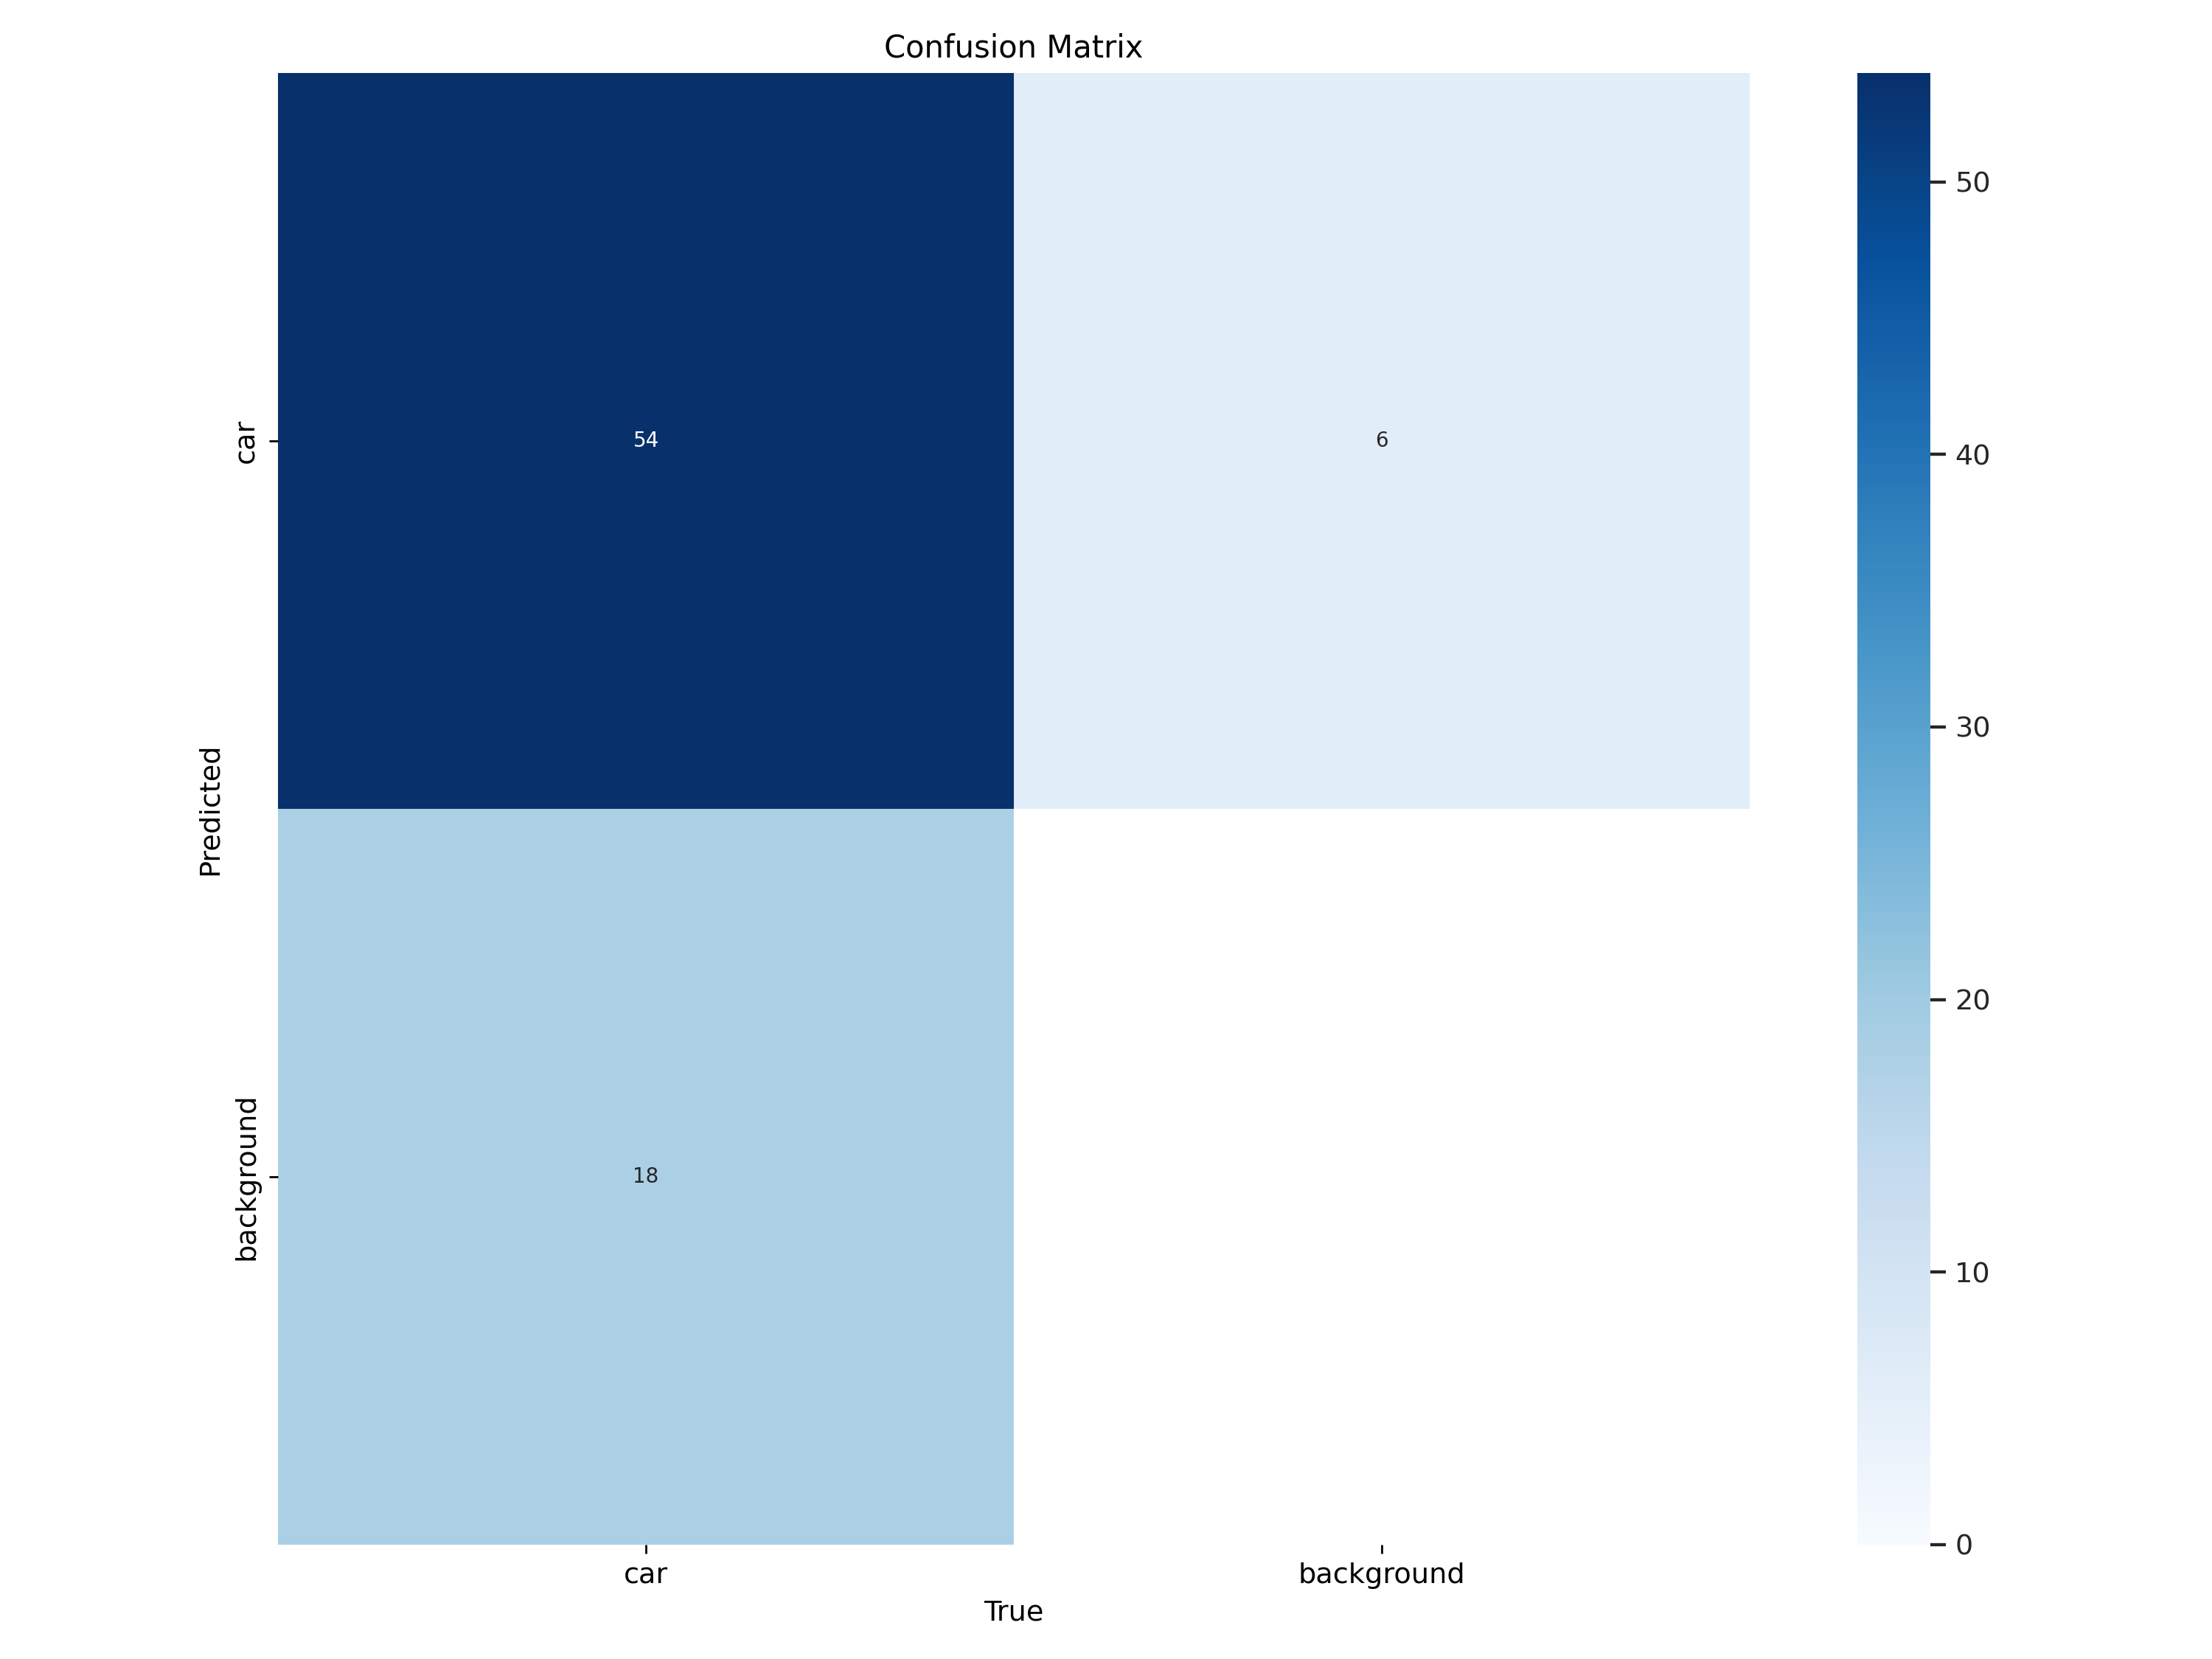

In [22]:
Image ('/content/runs/detect/train3/confusion_matrix.png', width=600)

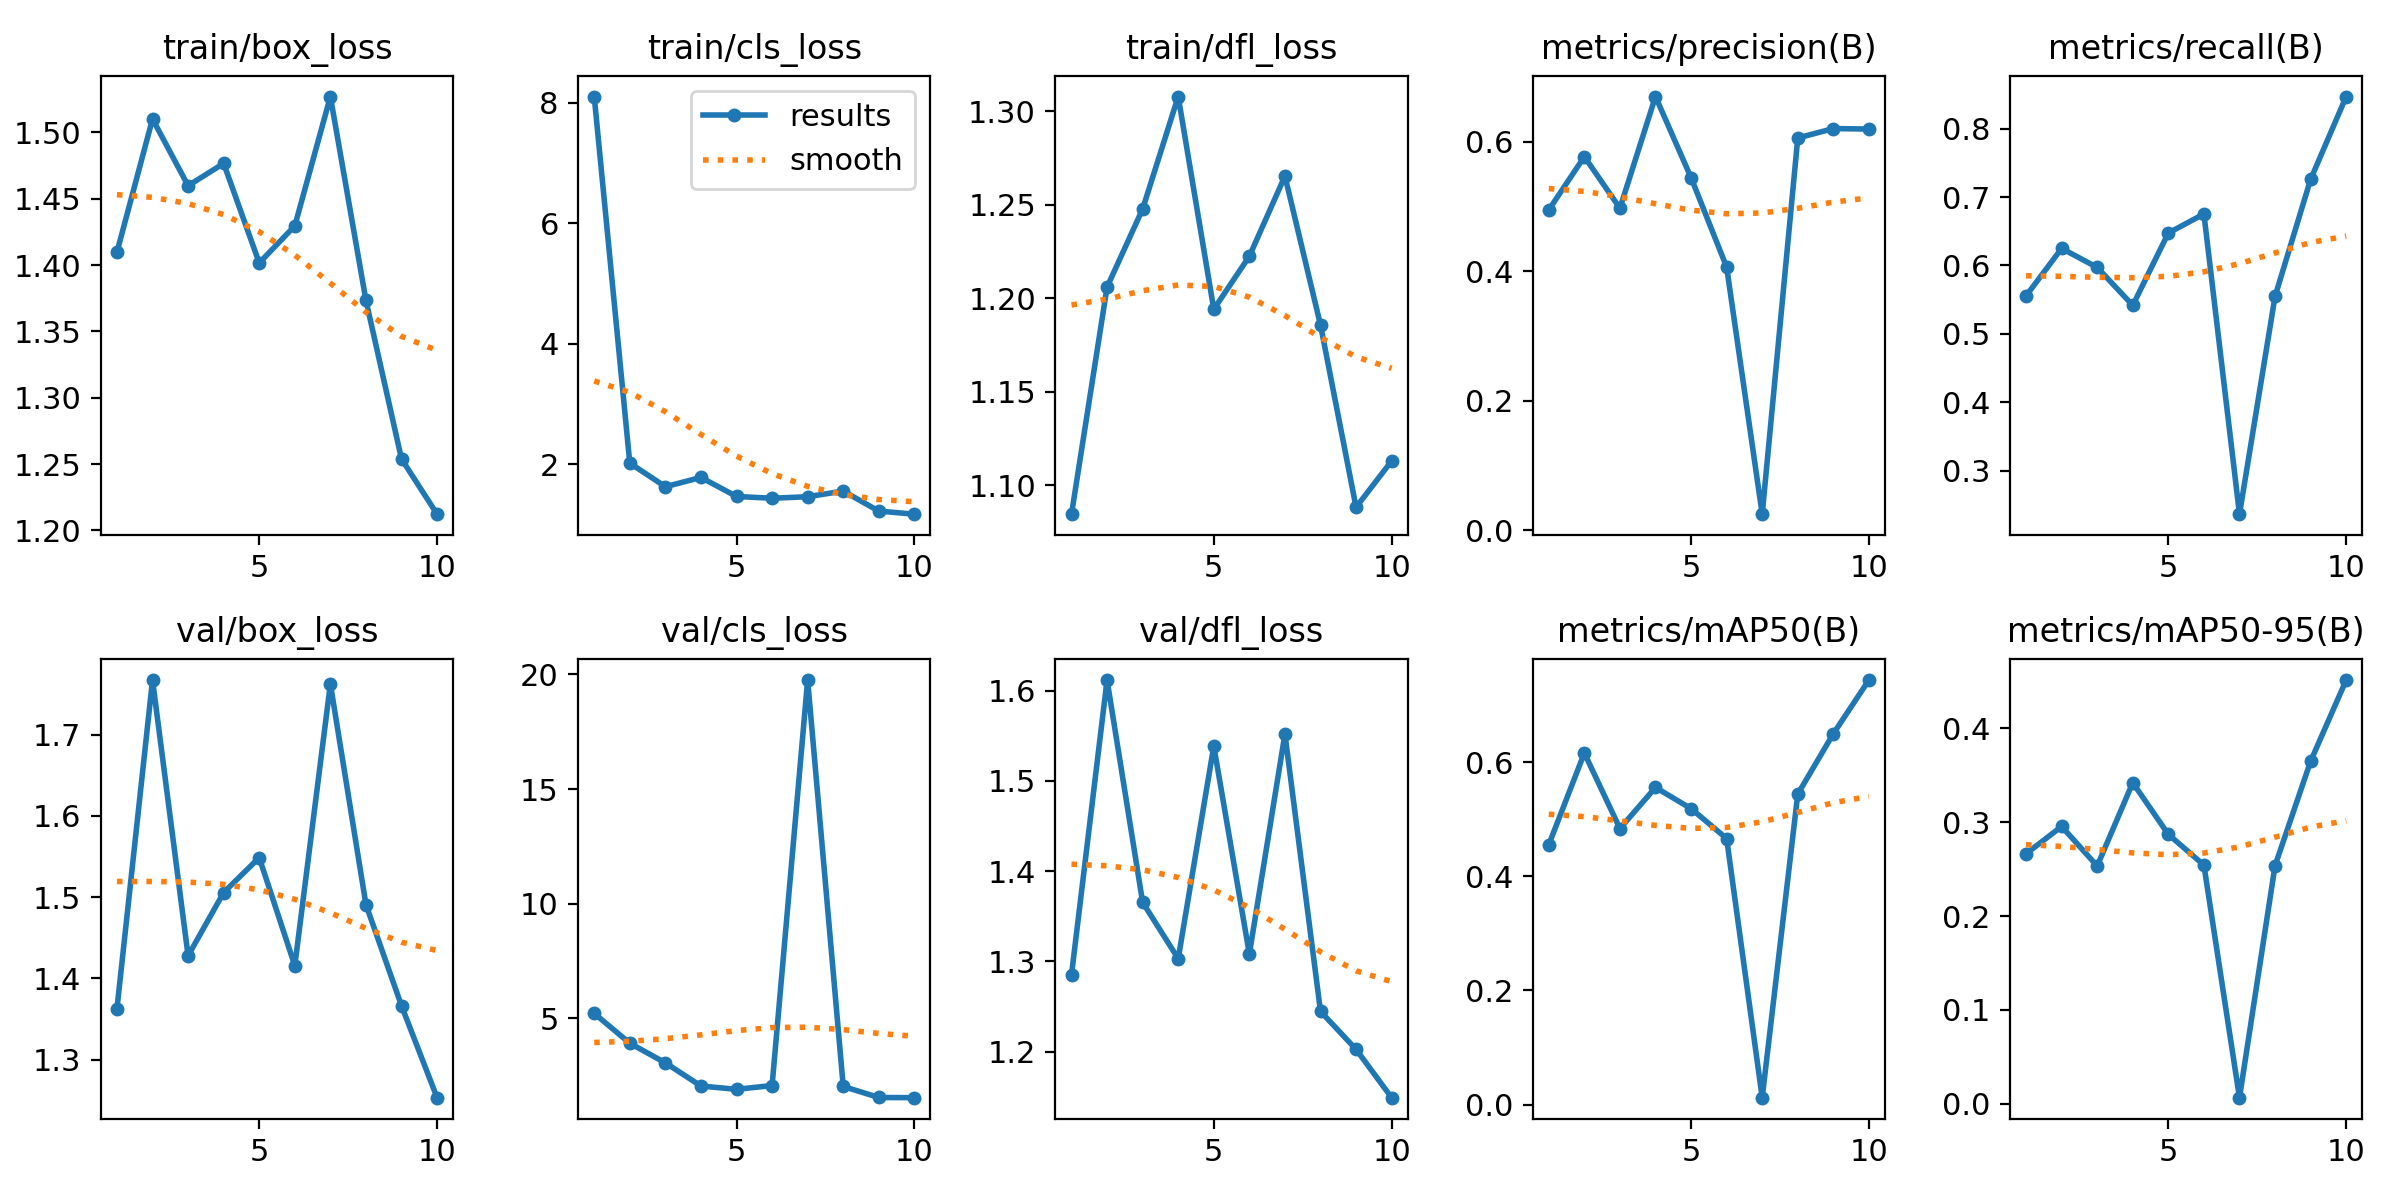

In [23]:
Image ('/content/runs/detect/train3/results.png')

#Vizualizing our trained model
Three batches were given:
+ val_batch0
+ val_batch1
+ val_batch2

#Batch0
Three images did not detect the cars inside them

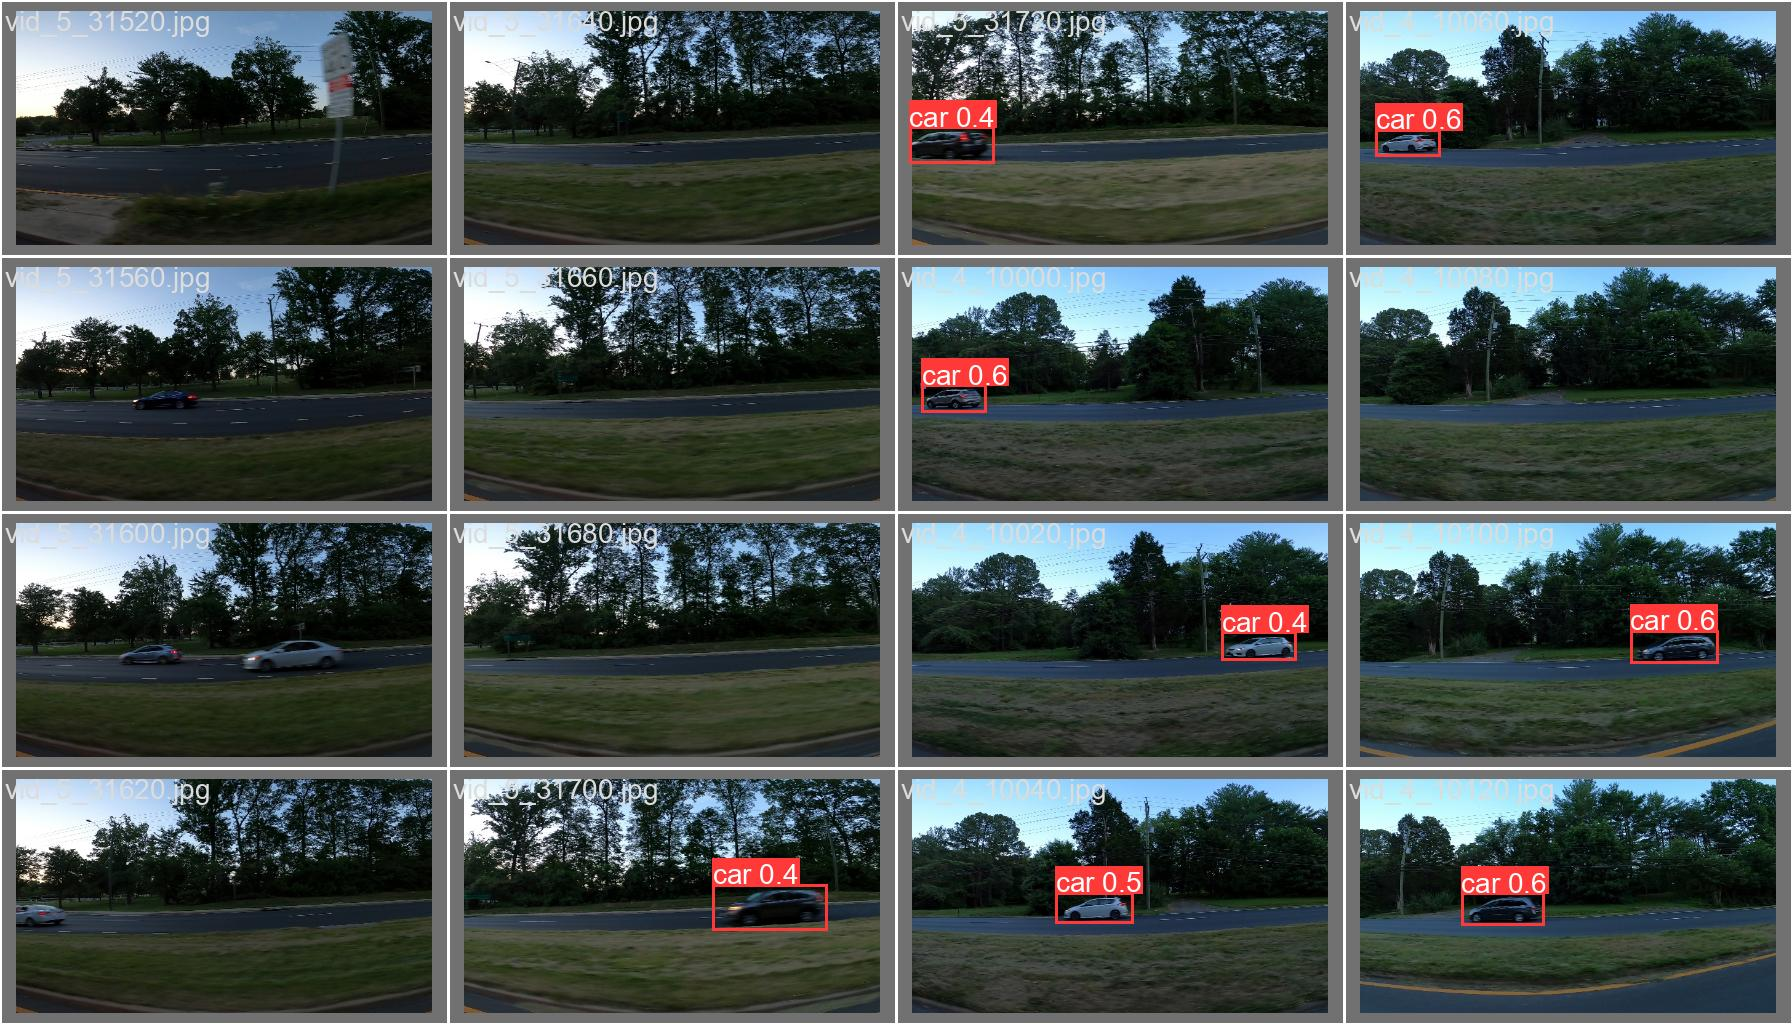

In [24]:
Image ('/content/runs/detect/train3/val_batch0_pred.jpg')

#Batch1
This whole batch was detected correctly

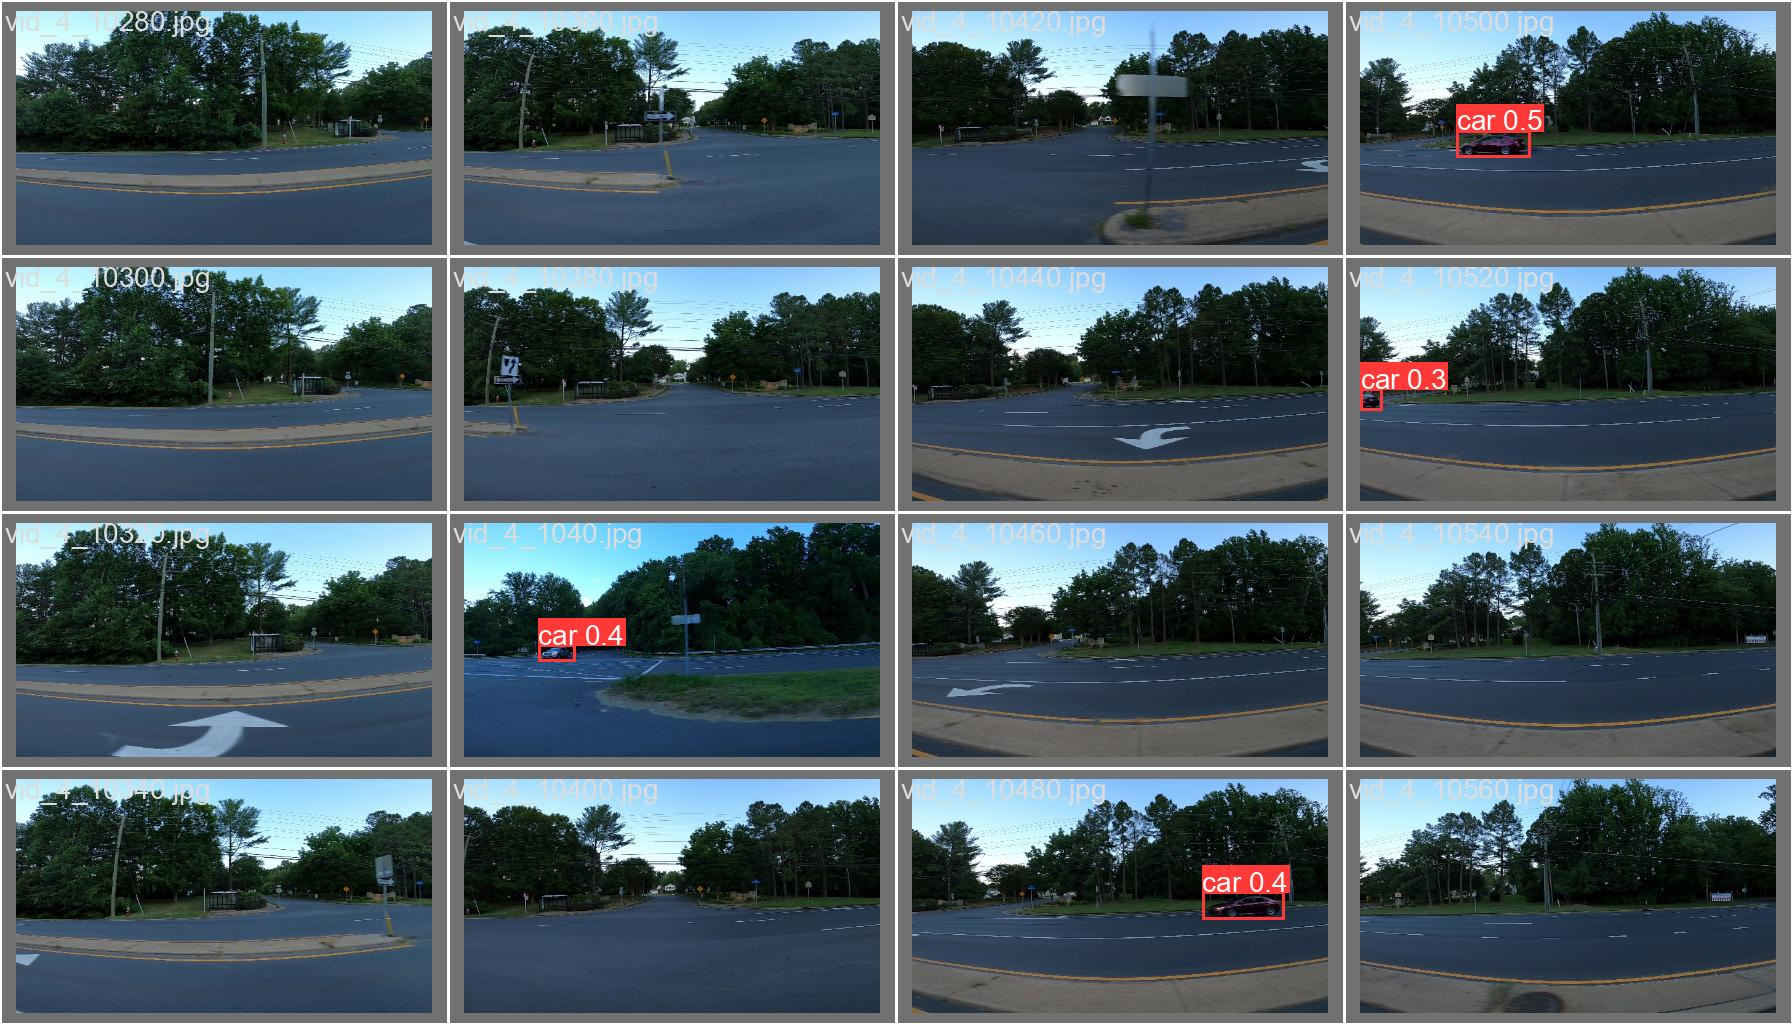

In [25]:
Image ('/content/runs/detect/train3/val_batch1_pred.jpg')

#Batch2
This batch was also detected without errors

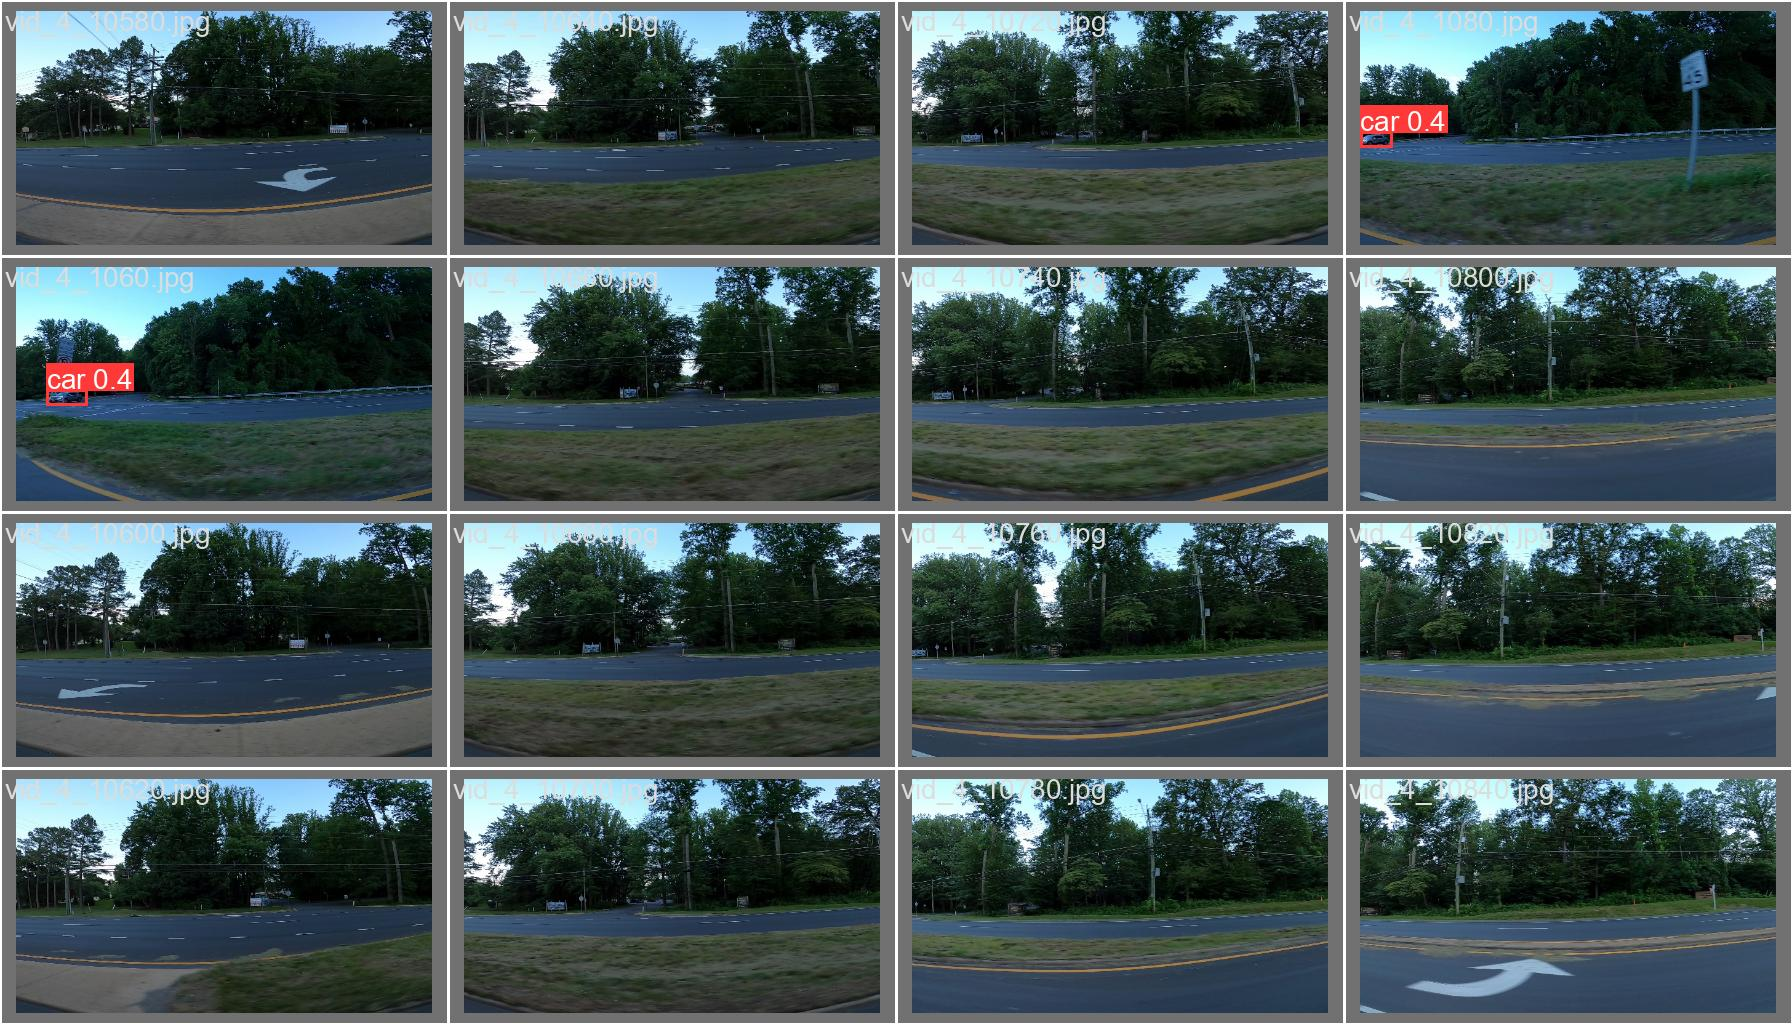

In [26]:
Image ('/content/runs/detect/train3/val_batch2_pred.jpg')

#Validation and Inference

* Running model validation on the best checkpoint (best.pt)
* Performing inference on the validation dataset with a confidence threshold of 0.25

Validating the model

In [28]:
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data='/content/gdrive/My Drive/Computer vision/Assignment/dataset.yaml'


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/gdrive/My Drive/Computer vision/Assignment/Data/labels/val.cache... 236 images, 164 backgrounds, 0 corrupt: 100% 236/236 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:04<00:00,  3.58it/s]
                   all        236         72       0.62      0.847      0.744      0.452
Speed: 0.6ms preprocess, 5.5ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


Inference with the best model

In [36]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.25 source='/content/gdrive/My Drive/Computer vision/Assignment/Data/images/val' save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/236 /content/gdrive/My Drive/Computer vision/Assignment/Data/images/val/vid_4_1000.jpg: 256x416 1 car, 103.3ms
image 2/236 /content/gdrive/My Drive/Computer vision/Assignment/Data/images/val/vid_4_10000.jpg: 256x416 1 car, 8.1ms
image 3/236 /content/gdrive/My Drive/Computer vision/Assignment/Data/images/val/vid_4_10020.jpg: 256x416 1 car, 18.6ms
image 4/236 /content/gdrive/My Drive/Computer vision/Assignment/Data/images/val/vid_4_10040.jpg: 256x416 1 car, 9.4ms
image 5/236 /content/gdrive/My Drive/Computer vision/Assignment/Data/images/val/vid_4_10060.jpg: 256x416 1 car, 11.8ms
image 6/236 /content/gdrive/My Drive/Computer vision/Assignment/Data/images/val/vid_4_10080.jpg: 256x416 (no detections), 8.5ms
image 7/236 /content/gdrive/My Drive/Computer vision/Assignment/Dat

#Visualizing Predictions

Displaying a subset of the predicted images with bounding boxes.

In [ ]:
!ls /content/runs/detect/predict3/

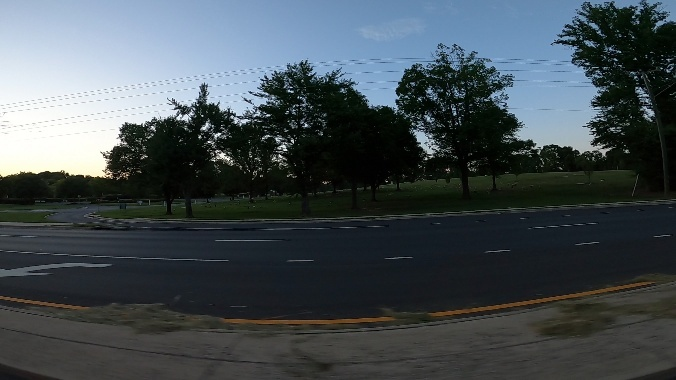

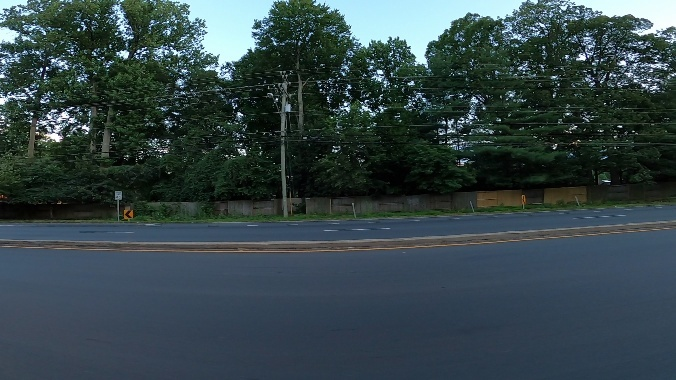

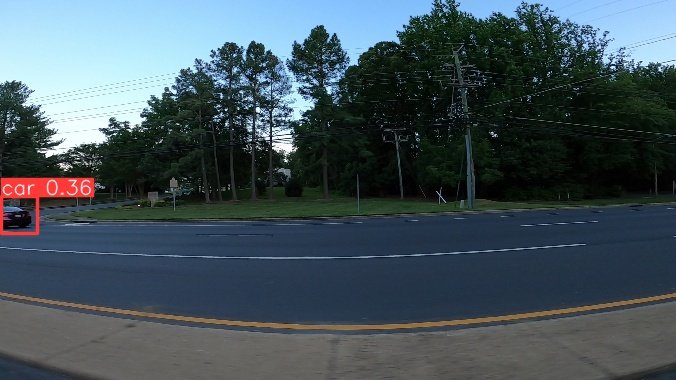

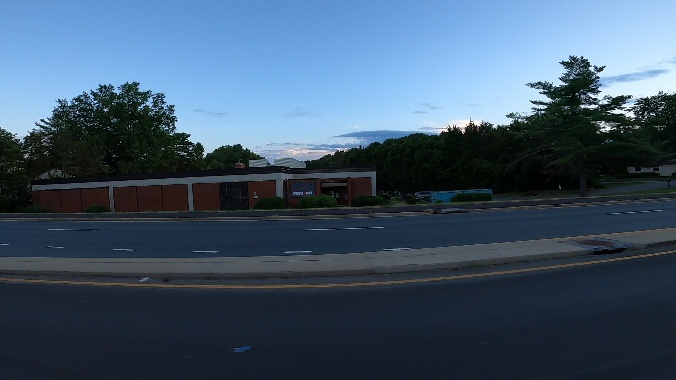

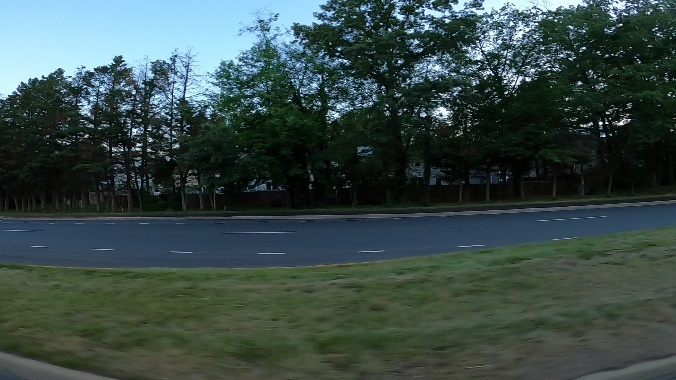

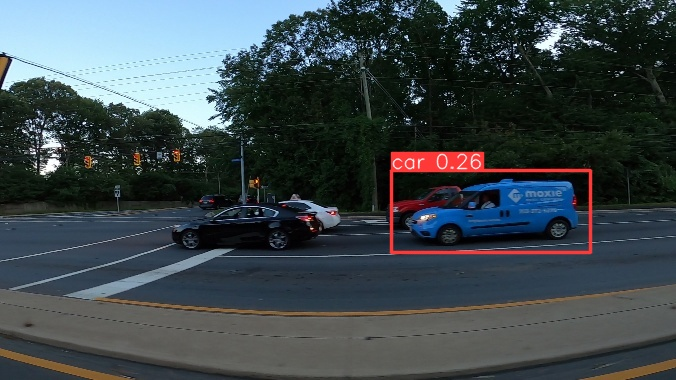

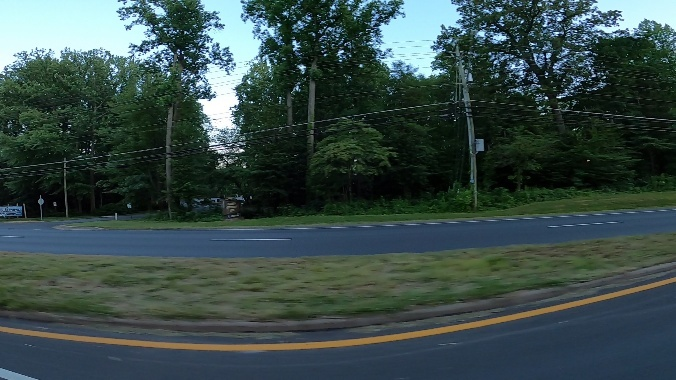

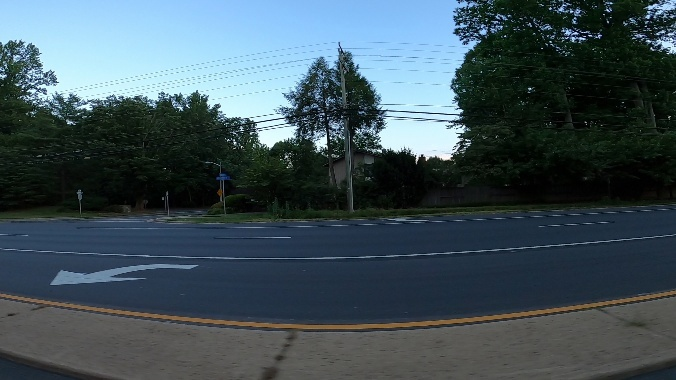

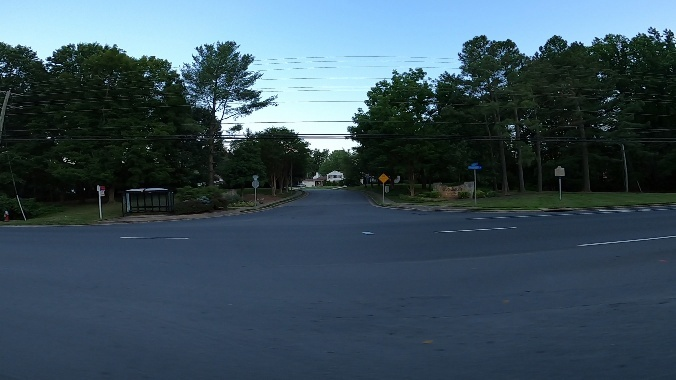

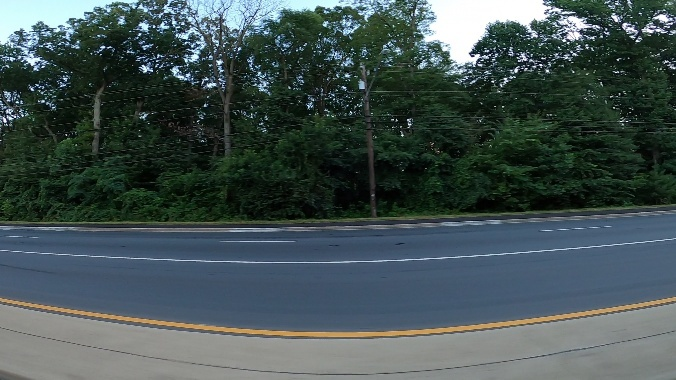

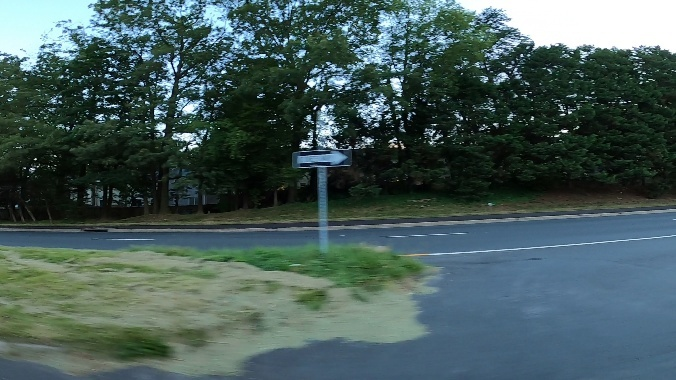

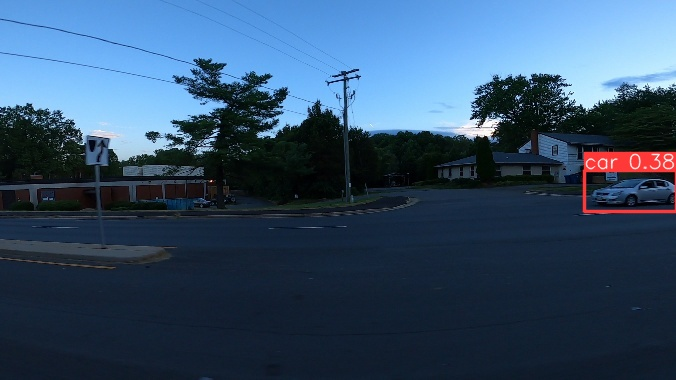

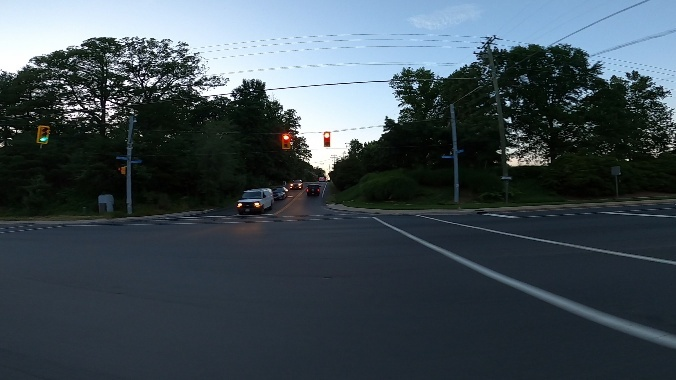

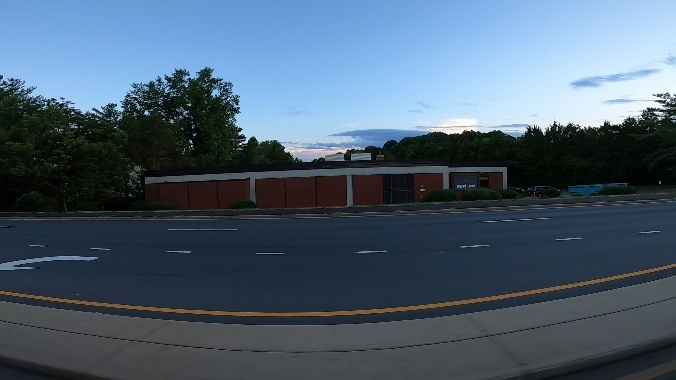

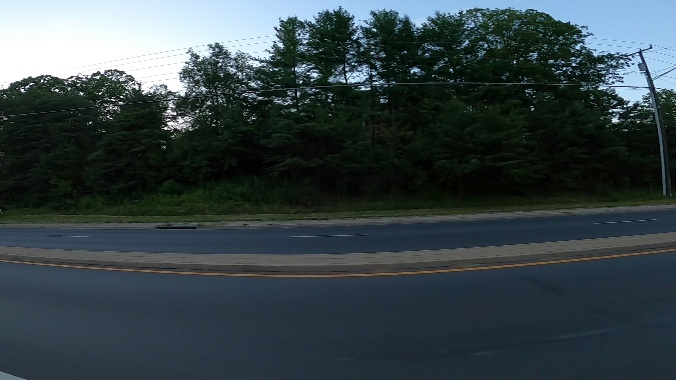

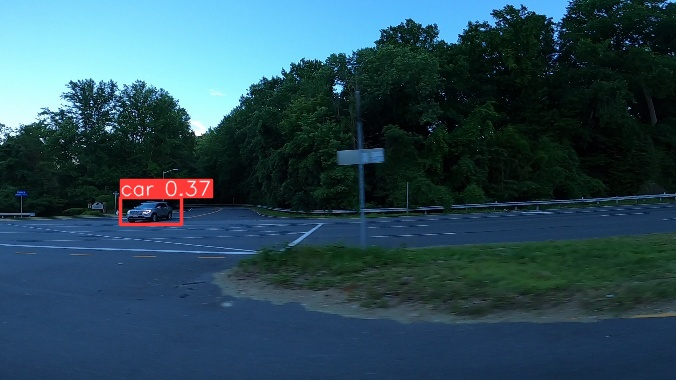

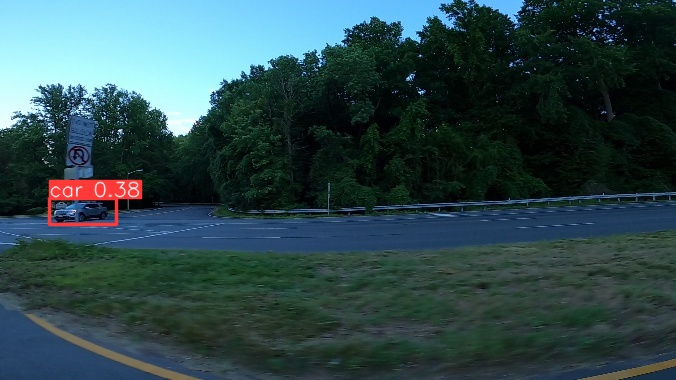

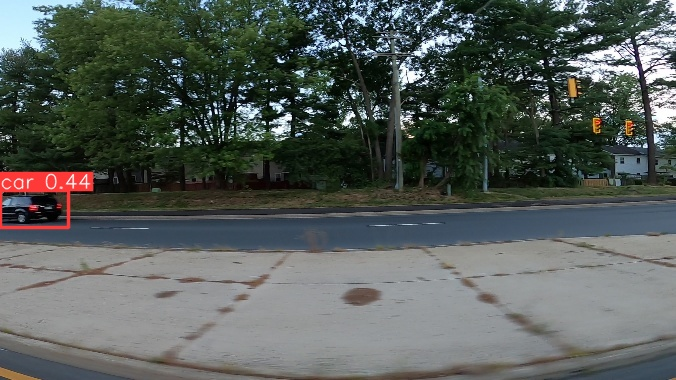

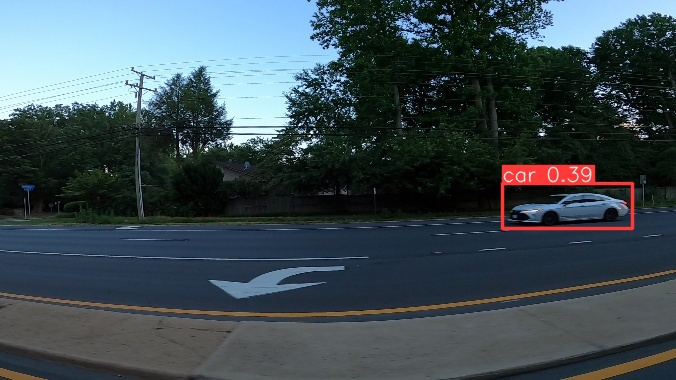

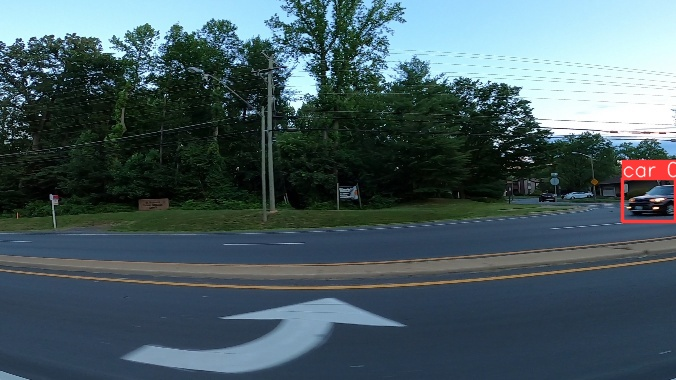

In [40]:
import glob
from IPython.display import Image, display

predicted_images_path = '/content/runs/detect/predict3/*.jpg'

for image_path in glob.glob(predicted_images_path)[:20]:  # Adjust the number [:] as needed
    display(Image(filename=image_path, width=800))
    print("\n")

#Conclusions
* After getting the best model (best.pt) out of the training process, and performing validation and inference over it. I displayed the detector results over the testing images to see how well it performs, even though there are some images with mistakes where the cars were not detected, most of them got predicted correctly.
* Due to the limitations fixed on the model (params and hyperparams) it is understandable it wont have the best accuracy, but it performed pretty good, I'm sure if the model had better training it would outperform the current model.

This notebook outlines the complete process of training a YOLOv8 model for car detection in road camera images. Despite limitations in computational resources, the pipeline demonstrates the ability to train and evaluate the model effectively.